## Vizulaization

### Vizualizaitons of dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import os

In [3]:
import plotly.io as pio
pio.renderers.default = "browser"

In [4]:
# ========== CONFIG ==========
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = (8, 5)

In [5]:
# ========== LOAD DATA ==========
def load_data(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    print(f"✅ Loaded {len(df)} records and {len(df.columns)} columns")
    return df

In [6]:

# ========== 1. Urgency Distribution ==========
def plot_urgency_distribution(df: pd.DataFrame):
    urgency_counts = df["urgency"].value_counts().reset_index()
    urgency_counts.columns = ["urgency", "count"]

    fig = px.bar(urgency_counts,
                x="urgency", y="count",
                color="urgency",
                title="Distribution of Urgency Levels",
                labels={"urgency": "Urgency Level", "count": "Count"})
    fig.show()


In [7]:
# ========== 2. Grievances per Department ==========
def plot_department_distribution(df: pd.DataFrame):
    dept_counts = df["department"].value_counts().reset_index()
    dept_counts.columns = ["department", "count"]

    fig = px.bar(dept_counts,
                 x="count", y="department",
                 orientation="h",
                 color="department",
                 title="Number of Grievances per Department")
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

In [8]:
# ========== 3. Urgency by Department ==========
def plot_urgency_by_department(df: pd.DataFrame):
    grouped = df.groupby(["department", "urgency"]).size().reset_index(name="count")

    fig = px.bar(grouped, 
                 x="department", y="count", 
                 color="urgency",
                 barmode="group",
                 title="Urgency Distribution by Department")
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

In [9]:
# ========== 4. Average Grievance Length ==========
def plot_grievance_length(df: pd.DataFrame):
    df["text_length"] = df["grievance"].astype(str).apply(len)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x="urgency", y="text_length", data=df, palette="Set2")
    plt.title("Grievance Text Length by Urgency Level")
    plt.xlabel("Urgency Level")
    plt.ylabel("Text Length (characters)")
    plt.tight_layout()
    plt.show()

In [14]:
# ========== 5. Word Cloud ==========
def plot_wordcloud(df: pd.DataFrame, urgency_level: str = None):
    if urgency_level:
        text = " ".join(df[df["urgency"] == urgency_level]["grievance"].dropna().astype(str))
        title = f"Word Cloud for {urgency_level} Grievances"
    else:
        text = " ".join(df["grievance"].dropna().astype(str))
        title = "Overall Word Cloud of Grievances"

    wc = WordCloud(width=1000, height=600, background_color="white", collocations=False).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# def plot_wordcloud(df, text_col="grievance", title="Word Cloud of Grievances"):
#     # 1️⃣ Combine all text safely
#     text_data = " ".join(df[text_col].dropna().astype(str).tolist())

#     # 2️⃣ Create word cloud with better parameters
#     wordcloud = WordCloud(
#         width=1000,
#         height=600,
#         background_color="white",
#         max_words=200,
#         collocations=False,  # prevents duplicates like “Nepal Nepal”
#         # font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",  # safe default for Linux
#     ).generate(text_data)

#     # 3️⃣ Plot it
#     plt.figure(figsize=(10, 6))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(title, fontsize=16)
#     plt.show()

In [15]:

# ========== 6. Run All Visualizations ==========
def run_eda_visualizations(csv_path: str):
    df = load_data(csv_path)
    plot_urgency_distribution(df)
    plot_department_distribution(df)
    plot_urgency_by_department(df)
    plot_grievance_length(df)
    plot_wordcloud(df)
    for level in df["urgency"].unique():
        plot_wordcloud(df, urgency_level=level)

✅ Loaded 6000 records and 4 columns
Opening in existing browser session.
Opening in existing browser session.
Opening in existing browser session.


/tmp/ipykernel_4470/2948492557.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




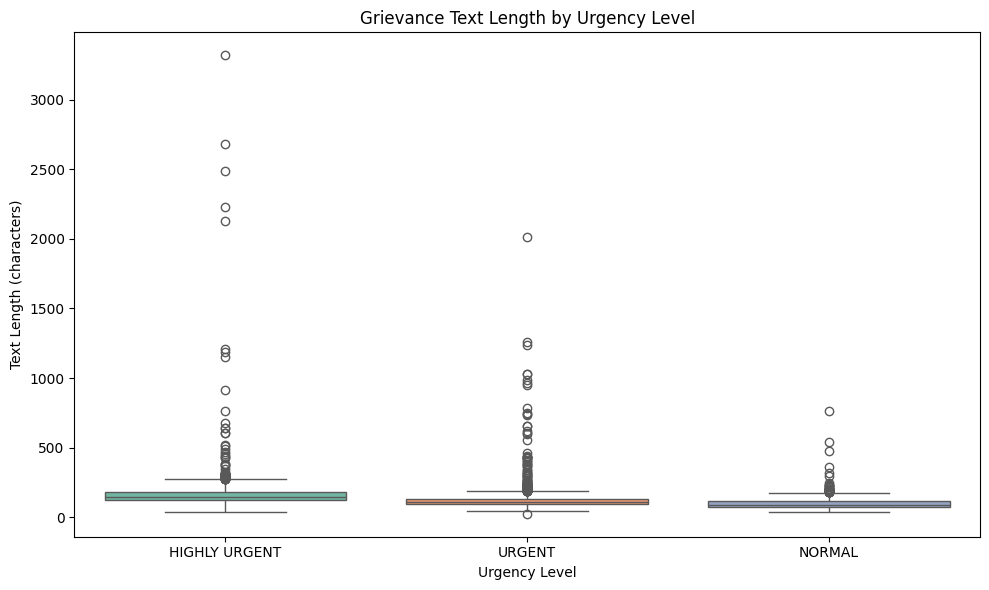

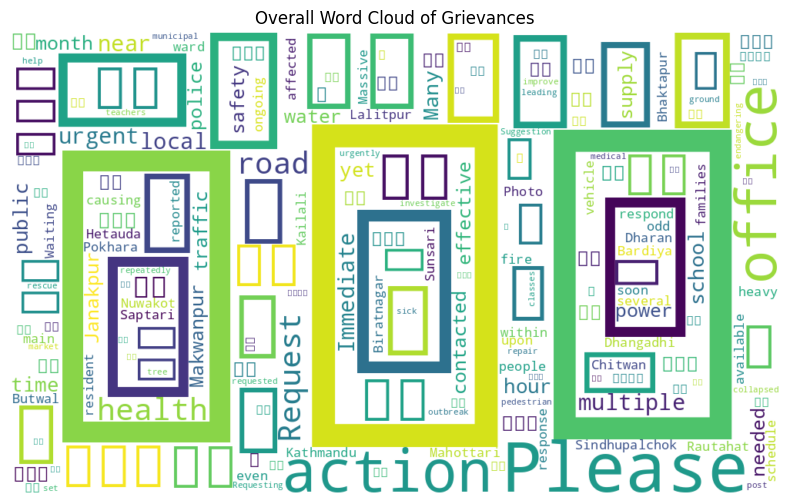

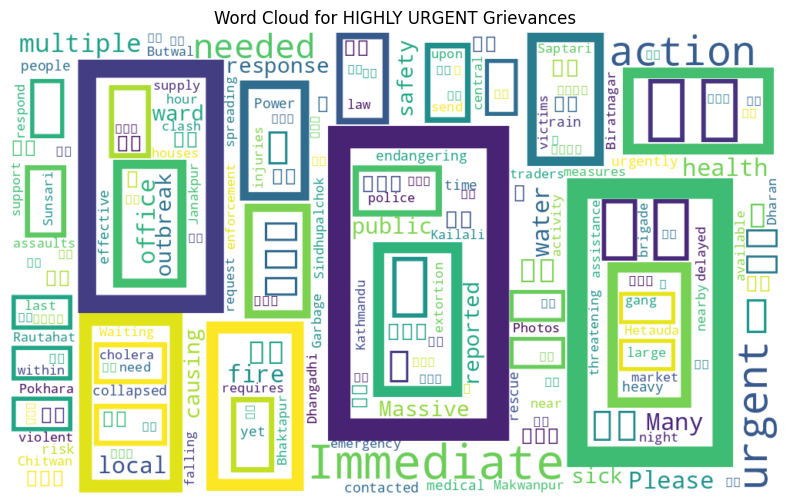

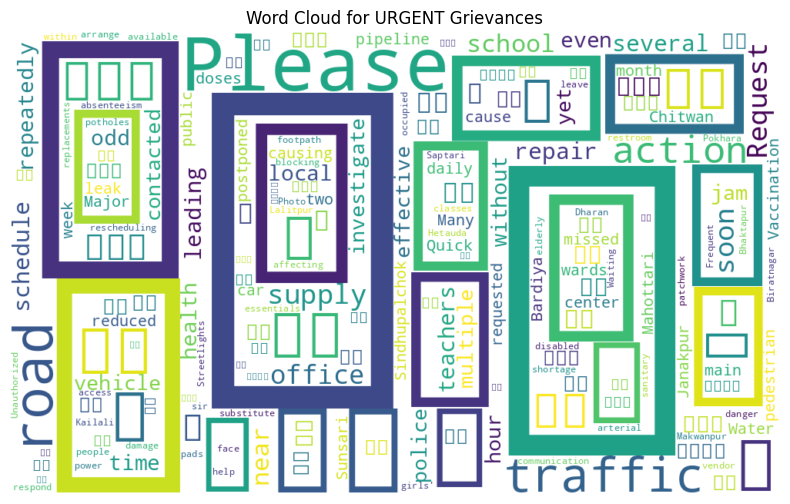

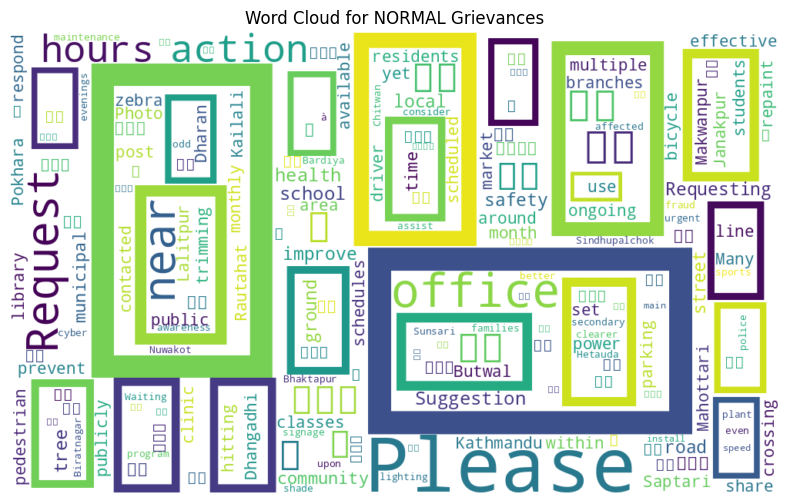

In [16]:
# ========== MAIN ==========
if __name__ == "__main__":
    csv_path = "../data/processed/sambodhan_balanced_dataset.csv"
    if os.path.exists(csv_path):
        run_eda_visualizations(csv_path)
    else:
        print(f"❌ CSV file not found at {csv_path}")

In [ ]:
df = pd.read_csv("../data/processed/final-grievance-data_with_urgency-dept.csv")
df.head()   

,id,urgency,grievance,department
0,83222,HIGHLY URGENT,Subject: Enhancing Nepal’s Tourism Policies an...,Municipal Governance & Community Services
1,74259,URGENT,स्वास्थ्य बिमा लागू नहुदा उपचारमा कठिनाई परेको,"Education, Health & Social Welfare"
2,73063,URGENT,युवा तथा साना व्यावसायी स्वरोजगार कोषमा रिक्त ...,Municipal Governance & Community Services
3,71078,HIGHLY URGENT,उपरोक्त सम्बन्धमा हामी निवेदकहरु यस प्राधिकरण ...,"Infrastructure, Utilities & Natural Resources"
4,67993,HIGHLY URGENT,वन कार्यालयका हाकिम र सहायक हाकिम हरुले गैर नै...,"Infrastructure, Utilities & Natural Resources"


In [ ]:
df["urgency"].value_counts()

urgency
URGENT           1128
NORMAL            411
HIGHLY URGENT     101
Name: count, dtype: int64

In [ ]:
df["department"].value_counts()

department
Security & Law Enforcement                       1341
Municipal Governance & Community Services         179
Infrastructure, Utilities & Natural Resources      90
Education, Health & Social Welfare                 30
Name: count, dtype: int64